In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [2]:
from google.colab import files

files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"abdelrahmanrabaei","key":"d7f4dc8a939525dd631a985de185d9f0"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! mkdir Costum


In [6]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.67G/2.70G [00:20<00:00, 120MB/s]
100% 2.70G/2.70G [00:21<00:00, 138MB/s]


In [7]:
! unzip new-plant-diseases-dataset.zip -d Costum

Streaming output truncated to the last 5000 lines.
  inflating: ResNet/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: ResNet/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: ResNet/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: ResNet/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: ResNet/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: ResNet/

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/ResNet/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',#Directory where the data is located. If labels is "inferred",
    #it should contain subdirectories, each containing images for a class.
    #Otherwise, the directory structure is ignored.
    labels="inferred",# Either "inferred" (labels are generated from the directory structure),
    #None (no labels), or a list/tuple of integer labels of the same size as the number of image files found in the directory.
    #Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).
    label_mode="categorical",#String describing the encoding of labels.
    #"categorical" means that the labels are encoded as a categorical vector
    class_names=None, #Only valid if labels is "inferred". This is the explicit list of class names
    #(must match names of subdirectories).Used to control the order of the classes (otherwise alphanumerical order is used).
    color_mode="rgb",
    batch_size=32,# Size of the batches of data. Defaults to 32. If None, the data will not be batched (the dataset will yield individual samples).
    image_size=(128,128),
    shuffle=True,# Whether to shuffle the data. Defaults to True. If set to False, sorts the data in alphanumeric order.
    seed=None,#Optional random seed for shuffling and transformations.
    validation_split=None,
    subset=None,
    interpolation="bilinear",#String, the interpolation method used when resizing images.
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/ResNet/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [12]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[134.5  104.5  104.5 ]
   [135.5  105.5  105.5 ]
   [129.75  99.75  99.75]
   ...
   [176.   156.   157.  ]
   [163.75 143.75 144.75]
   [164.25 144.25 145.25]]

  [[134.75 104.75 104.75]
   [134.75 104.75 104.75]
   [139.25 109.25 109.25]
   ...
   [159.5  139.5  140.5 ]
   [165.75 145.75 146.75]
   [161.5  141.5  142.5 ]]

  [[142.   112.   112.  ]
   [139.25 109.25 109.25]
   [147.25 117.25 117.25]
   ...
   [164.75 144.75 145.75]
   [160.5  140.5  141.5 ]
   [161.25 141.25 142.25]]

  ...

  [[145.5  115.5  113.5 ]
   [143.25 113.25 111.25]
   [138.5  108.5  106.5 ]
   ...
   [159.   138.   137.  ]
   [165.25 144.25 143.25]
   [165.75 144.75 143.75]]

  [[139.5  109.5  107.5 ]
   [142.5  112.5  110.5 ]
   [143.25 113.25 111.25]
   ...
   [170.75 149.75 148.75]
   [170.25 149.25 148.25]
   [160.75 139.75 138.75]]

  [[145.   115.   113.  ]
   [144.5  114.5  112.5 ]
   [138.5  108.5  106.5 ]
   ...
   [167.5  146.5  145.5 ]
   [168.75 147.75 146.75]
   [157.   136.   13

In [13]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [15]:

model = Sequential()

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))#Appling 32 different type of filters
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))#Appling 32 different type of filters
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))#Appling 32 different type of filters
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))#Appling 32 different type of filters
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))#Appling 32 different type of filters
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))#To avoid Overfitting
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(units=38,activation='softmax'))

In [17]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                   

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 75s 31ms/step - loss: 1.3628 - accuracy: 0.5982 - val_loss: 0.5480 - val_accuracy: 0.8328
Epoch 2/10
2197/2197 [==============================] - 64s 29ms/step - loss: 0.4379 - accuracy: 0.8629 - val_loss: 0.2656 - val_accuracy: 0.9148
Epoch 3/10
2197/2197 [==============================] - 64s 29ms/step - loss: 0.2593 - accuracy: 0.9170 - val_loss: 0.3189 - val_accuracy: 0.9004
Epoch 4/10
2197/2197 [==============================] - 64s 29ms/step - loss: 0.1763 - accuracy: 0.9424 - val_loss: 0.1660 - val_accuracy: 0.9486
Epoch 5/10
2197/2197 [==============================] - 64s 29ms/step - loss: 0.1341 - accuracy: 0.9561 - val_loss: 0.1784 - val_accuracy: 0.9442
Epoch 6/10
2197/2197 [==============================] - 64s 29ms/step - loss: 0.1058 - accuracy: 0.9658 - val_loss: 0.1727 - val_accuracy: 0.9487
Epoch 7/10
2197/2197 [==============================] - 64s 29ms/step - loss: 0.0857 - accuracy: 0.9718 - val_loss: 0.1403 -

In [20]:
# model Evaluation On Training Set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 23s 11ms/step - loss: 0.0506 - accuracy: 0.9843


In [21]:
print(train_loss,train_acc)

0.050618380308151245 0.9843232035636902


In [22]:
# model Evaluation On validation Set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 6s 11ms/step - loss: 0.1549 - accuracy: 0.9564


In [23]:
print(val_loss,val_acc)

0.1549370139837265 0.9563510417938232


In [24]:
model.save("trained_Costum_model.keras")

In [25]:
model.save("trained_Costum_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
training_history.history

{'loss': [1.362750768661499,
  0.4379202723503113,
  0.2592708468437195,
  0.17632755637168884,
  0.13412344455718994,
  0.10581139475107193,
  0.08574113249778748,
  0.07524799555540085,
  0.06341792643070221,
  0.0558902733027935],
 'accuracy': [0.5981506705284119,
  0.862949013710022,
  0.9170210957527161,
  0.9423998594284058,
  0.9560708403587341,
  0.9658297300338745,
  0.9718329906463623,
  0.9754036664962769,
  0.9797709584236145,
  0.9812077879905701],
 'val_loss': [0.5479997992515564,
  0.26555559039115906,
  0.3188856244087219,
  0.1660209745168686,
  0.17837783694267273,
  0.17270660400390625,
  0.140313059091568,
  0.14493265748023987,
  0.09929614514112473,
  0.15493690967559814],
 'val_accuracy': [0.8328021764755249,
  0.9147507548332214,
  0.9003528356552124,
  0.9486114382743835,
  0.9441725611686707,
  0.9487252235412598,
  0.9587411880493164,
  0.957659900188446,
  0.9685863852500916,
  0.9563510417938232]}

In [27]:
#Recoding The History in json
import json
with open("training_hist_4.json","w") as f:
    json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [29]:
training_history.history

{'loss': [1.362750768661499,
  0.4379202723503113,
  0.2592708468437195,
  0.17632755637168884,
  0.13412344455718994,
  0.10581139475107193,
  0.08574113249778748,
  0.07524799555540085,
  0.06341792643070221,
  0.0558902733027935],
 'accuracy': [0.5981506705284119,
  0.862949013710022,
  0.9170210957527161,
  0.9423998594284058,
  0.9560708403587341,
  0.9658297300338745,
  0.9718329906463623,
  0.9754036664962769,
  0.9797709584236145,
  0.9812077879905701],
 'val_loss': [0.5479997992515564,
  0.26555559039115906,
  0.3188856244087219,
  0.1660209745168686,
  0.17837783694267273,
  0.17270660400390625,
  0.140313059091568,
  0.14493265748023987,
  0.09929614514112473,
  0.15493690967559814],
 'val_accuracy': [0.8328021764755249,
  0.9147507548332214,
  0.9003528356552124,
  0.9486114382743835,
  0.9441725611686707,
  0.9487252235412598,
  0.9587411880493164,
  0.957659900188446,
  0.9685863852500916,
  0.9563510417938232]}

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

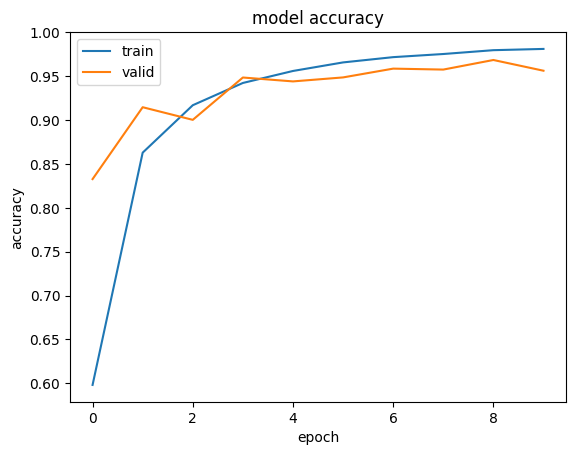

In [30]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

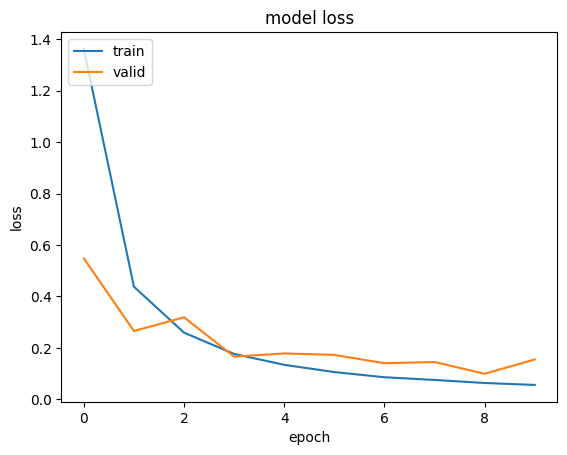

In [31]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/ResNet/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred =model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 36s 2ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
print(len(test_set))

17572


In [38]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.88      0.93       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.95       440
                                   Apple___healthy       0.94      0.96      0.95       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.87      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

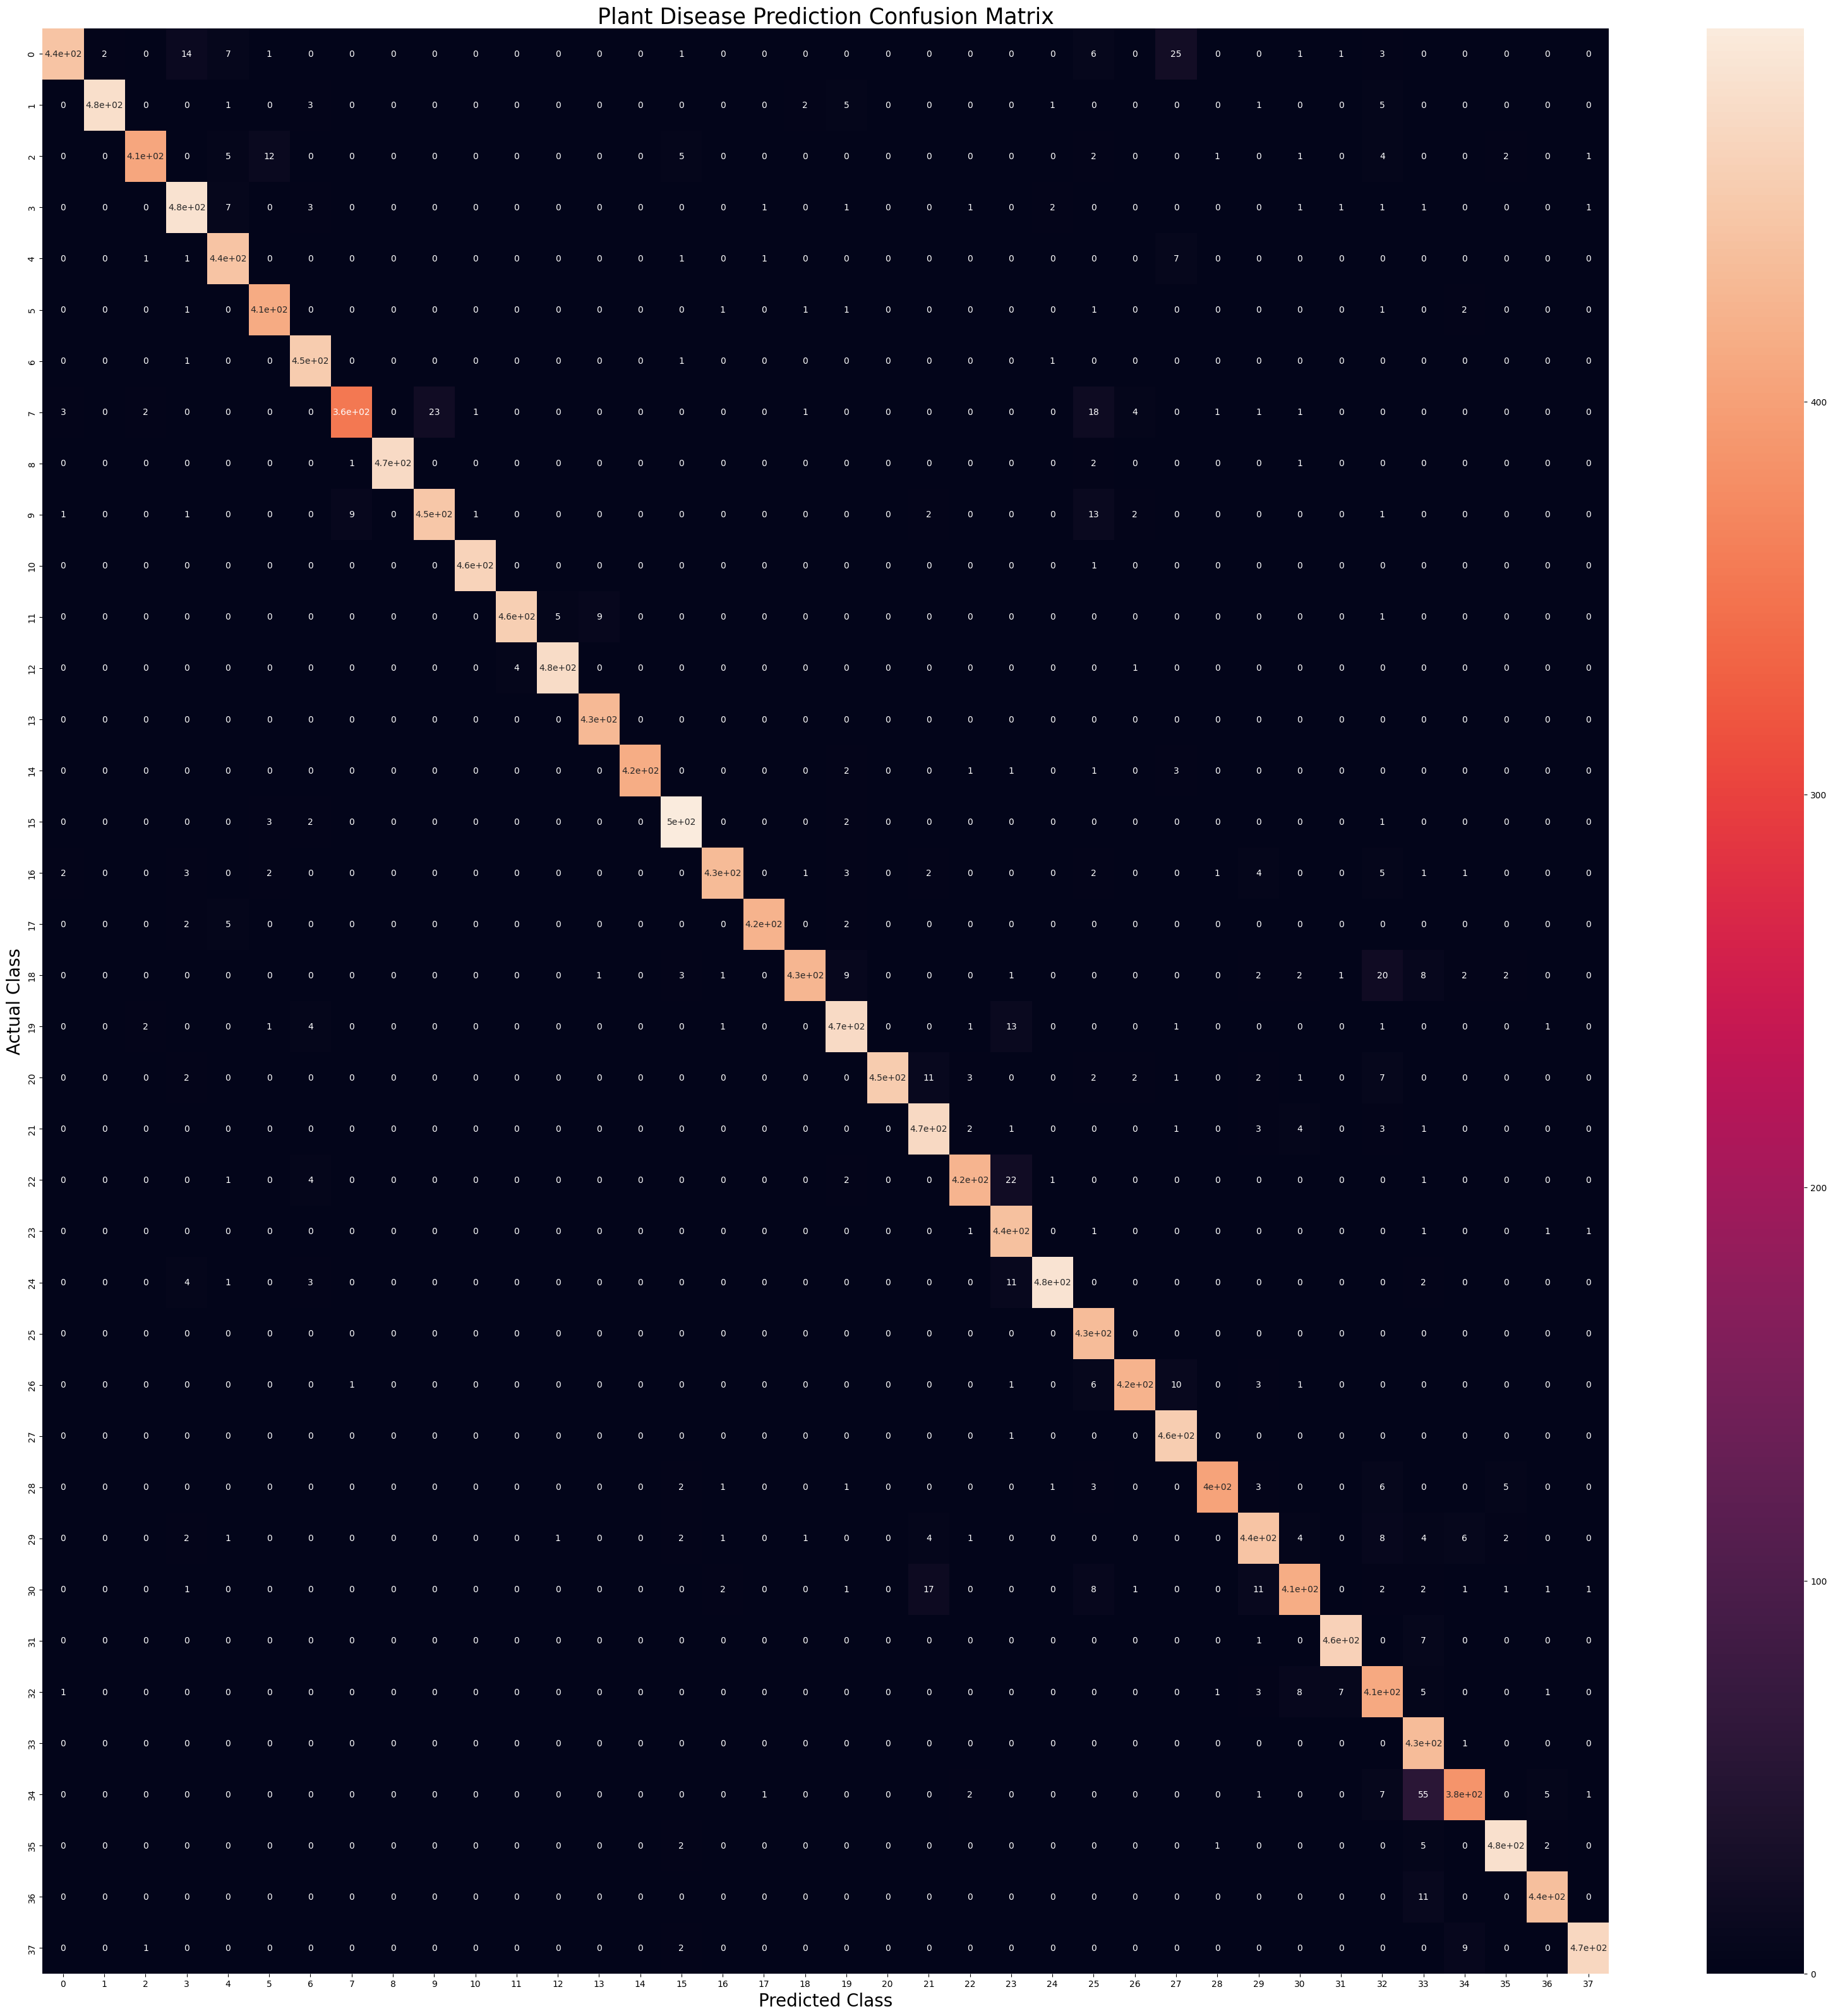

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize =20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [44]:
from google.colab import files

files.download("trained_Costum_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
from google.colab import files

files.download("trained_Costum_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>